# Introduction
In Part II, we performed simple exploratory data analysis and examined the data in the columns. We also created a new column named "Revenue" and exported the new DataFrame as a CSV.

In this section, we will pretend that we are employees in this store, and answer questions that are relevant to the business.

As such, in this notebook, you will do the following:
1. Import pandas and data visualization libraries
2. Perform in-depth analyses with groupby and resamples

### Step 1: Import the following libraries
- pandas as pd
- matplotlib.pyplot as plt
- seaborn as sns

In [1]:
# Step 1: Import the libraries you need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Read the CSV from Part II
Remember the CSV that you exported from Part II? Time to read it here in this notebook!

Similar to Part II, here are the things you need to do:
1. Parse dates as True
2. Make the InvoiceDate column as the index of the DataFrame

As a reminder, this is what you should see:

![ExpectedDataFrameWithRevenue.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/ExpectedDataFrameWithRevenue.png)

In [2]:
# Step 2: Read your CSV from Part II
df = pd.read_csv('/Users/sm/Desktop/CourseMaterials/Project Sales Analysis v0.2.csv', parse_dates=True, index_col='InvoiceDate')
df

/Users/sm/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60


### Step 3: Get the value counts of Invoice
<blockquote>Store Boss: "How many invoices do we have and what are the top few?"</blockquote>
We start off by looking at the Invoice column, and tabulate the frequency of the unique Invoices.

There are at least two ways to do this:
1. Use a pandas method that lets you do a <strong>value count</strong> of the column values
2. Perform a groupby a groupby, based on Invoice, followed by getting the size of the groupby Object

1 is easier, and involves only one line of code. 2 requires not just a single groupby operation but you will need to sort the results to get the top invoices by count.

![ValueCountGroupBy.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/ValueCountGroupBy.png)

Observe the note of the number of unique Invoices in the dataset, and compare it to the total number of rows in the DataFrame.

In [19]:
# Step 3: Get the value counts of Invoice
df['Invoice'].value_counts()

537434    1350
538071    1302
537638    1202
537237    1194
536876    1186
          ... 
554277       1
490881       1
554263       1
490922       1
503937       1
Name: Invoice, Length: 40082, dtype: int64

In [24]:
df.groupby(by='Invoice')['Invoice'].count().sort_values(ascending=False)

Invoice
537434     1350
538071     1302
537638     1202
537237     1194
536876     1186
           ... 
556725        1
556684        1
511126        1
511161        1
C496350       1
Name: Invoice, Length: 40082, dtype: int64

### Step 4: Get the value counts of Customer ID
<blockquote>Store Boss: "Who is our best customer that bought the most stuff?"</blockquote>
Next, we get the value counts of Customer ID to see how many unique customers there are in the DataFrame, and the number of orders the most frequently purchasing customer is. 

In [27]:
# Step 4: Get the value counts of Customer ID
df['Customer ID'].nunique()

5878

### Step 5: Get the value counts of Country
<blockquote>Store Boss: "Where do our customers come from?"</blockquote>
Let's take a look at the countries that the customers come from. 

Get the value counts of the Country column, and see which countries are found in the DataFrame.

In [28]:
# Step 5: Get the value count of Country
df['Country'].value_counts()

United Kingdom          958502
EIRE                     17349
Germany                  16694
France                   13940
Netherlands               5088
Spain                     3719
Switzerland               3136
Belgium                   3068
Portugal                  2562
Australia                 1812
Channel Islands           1569
Italy                     1468
Norway                    1436
Sweden                    1338
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Unspecified                752
Greece                     657
Poland                     512
Japan                      485
United Arab Emirates       467
USA                        409
Israel                     369
Hong Kong                  358
Singapore                  339
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        167
Bahrain 

### Step 6: Get the value counts of Description
<blockquote>Store Boss: "What is the most commonly purchased item?"</blockquote>
Last value count that you'll need to do for your boss - are you curious what items get purchased the most?

Do a value count of the items in Description to see which are the top five most purchased items.

In [29]:
# Step 6: Get the value count of Description
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5778
REGENCY CAKESTAND 3 TIER              4061
JUMBO BAG RED RETROSPOT               3391
ASSORTED COLOUR BIRD ORNAMENT         2938
PARTY BUNTING                         2740
                                      ... 
16 PC CUTLERY SET PANTRY DESIGN          1
VINTAGE METAL CAKE STAND CREAM           1
PINK BALLET OPENING CUBE BOX             1
SPOTTY COCKEREL DOORSTOP                 1
SET OF 4 KNICK KNACK TINS  DOILEY        1
Name: Description, Length: 5399, dtype: int64

### Step 7: Get the sum of the revenue by country
<blockquote>Store Boss: "How much revenue in total did we get from each country?"</blockquote>
To find this out, we will need to perform two things:

1. Perform a groupby operation by country, with a sum method
2. Sort the resulting DataFrame in a descending order

You'll hope to see something like this:
![GroupByRevenue.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/GroupByRevenue.png)

In [30]:
# Step 7: Get the sum of revenue by country with groupby
df.groupby(by='Country')['Revenue'].sum().sort_values(ascending=False)

Country
United Kingdom          1.787135e+07
EIRE                    6.644318e+05
Netherlands             5.542323e+05
Germany                 4.312625e+05
France                  3.569446e+05
Australia               1.699681e+05
Spain                   1.091785e+05
Switzerland             1.010113e+05
Sweden                  9.190372e+04
Denmark                 6.986219e+04
Belgium                 6.575342e+04
Norway                  6.010962e+04
Portugal                5.801665e+04
Japan                   4.713839e+04
Channel Islands         4.499676e+04
Italy                   3.255042e+04
Finland                 2.992554e+04
Singapore               2.531706e+04
Cyprus                  2.498013e+04
Hong Kong               2.389432e+04
Austria                 2.361301e+04
Greece                  1.909619e+04
Israel                  1.133466e+04
United Arab Emirates    1.109763e+04
Unspecified             1.093601e+04
Poland                  1.090245e+04
USA                     8.3668

### Step 8: Resample the DataFrame by month and obtain sum of Quantity and Revenue
When we plotted the time series for Quantity in Part II, it presented a few challenges:

1. the time stamps are repeated, i.e. multiple purchases are happening
2. the range in purchase quantity is large
3. the timescale is too granular

As such, we should take the median of either each hour/day's purchase to plot instead. 

Resampling is useful in this case, where we get the sum/median/mean of the quantities over time. 

If you have not done so already, <strong>make InvoiceDate the index of the DataFrame and make sure it is in a DateTime format</strong>. Here's what you'll have to do next:

1. Resample the DataFrame by month ('M'), along with summing
2. Take only the "Quantity" and "Revenue" columns

If you do resampling method and obtain the sum for each day, you would see this:

![ResampleSumExpectation.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/ResampleSumExpectation.png)

<strong>Hint: Google "resample dataframe by day median"</strong>

In [33]:
# Step 8: Get the resample by month, containg the sum of the quantities
Mon=df[['Quantity', 'Revenue']].resample('M', convention='end').sum()
Mon

,Quantity,Revenue
InvoiceDate,,
2009-12-31,426981,825685.760
2010-01-31,391525,652708.502
2010-02-28,382782,553713.306
2010-03-31,527401,833570.131
2010-04-30,368198,681528.992
2010-05-31,397206,659858.860
2010-06-30,408636,752270.140
2010-07-31,338920,650712.940
2010-08-31,473420,697274.910


### Step 9: Plot Quantity over the months
<blockquote>Store Boss: "How many items did we sell over time?"</blockquote>
Using the monthly resample DataFrame from Step 8, plot Quantity over time.

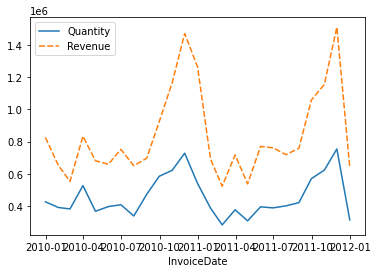

In [40]:
# Step 9: Plot Quantity over the months
sns.lineplot(data=Mon)
plt.show()

### Step 10: Plot Revenue over the months
<blockquote>Store Boss: "How much money did we make over time?"</blockquote>
Similarly, using the monthly resample DataFrame from Step 8, plot Revenue over time.

In [10]:
# Step 10: Plot Revenue over the months


The two graphs are relatively similar, and it gives you an idea of:

1. When the most critical period where you need to have enough stock is
2. When the store will make the most money

## Text analysis

<blockquote>Store Boss: "What is the most common colors and items that we sell?"</blockquote>

We'll move on to our last section, where we perform simple text analysis on the items in Description. 

More specifically, we will use a wordcloud to visualize the most common words for the store boss.

We will be referring to the work done in this useful resource: https://www.datacamp.com/community/tutorials/wordcloud-python

### Step 11: Import wordcloud library
If you don't have the wordcloud library, just head on over to your Anaconda Prompt (for Windows) or your Terminal (for Apple) and install it.

In [50]:
# Step 11: Import wordcloud library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Step 12: Get a list of containing all of the items sold so far
Since the Description column currently contains all of the items bought in the store, you will need to get a list of unique values, i.e. no duplicates, in your DataFrame's Description column. 

There are two ways to do this: 

1. turn your Description column into a set {}
2. get a unique list of items from your column using a pandas method

<strong>Hint: Google "get unique values in pandas column"</strong>

In [44]:
# Step 12: Get a list fo unique items from Description column
Des=list(df['Description'].drop_duplicates())
Des

['15CM CHRISTMAS GLASS BALL 20 LIGHTS',
 'PINK CHERRY LIGHTS',
 ' WHITE CHERRY LIGHTS',
 'RECORD FRAME 7" SINGLE SIZE ',
 'STRAWBERRY CERAMIC TRINKET BOX',
 'PINK DOUGHNUT TRINKET POT ',
 'SAVE THE PLANET MUG',
 'FANCY FONT HOME SWEET HOME DOORMAT',
 'CAT BOWL ',
 'DOG BOWL , CHASING BALL DESIGN',
 'HEART MEASURING SPOONS LARGE',
 'LUNCHBOX WITH CUTLERY FAIRY CAKES ',
 'DOOR MAT BLACK FLOCK ',
 'LOVE BUILDING BLOCK WORD',
 'HOME BUILDING BLOCK WORD',
 'ASSORTED COLOUR BIRD ORNAMENT',
 ' PEACE WOODEN BLOCK LETTERS',
 'CHRISTMAS CRAFT WHITE FAIRY ',
 'HEART IVORY TRELLIS LARGE',
 'HEART FILIGREE DOVE LARGE',
 'FULL ENGLISH BREAKFAST PLATE',
 'PIZZA PLATE IN BOX',
 'BLACK DINER WALL CLOCK',
 'SET OF 3 BLACK FLYING DUCKS',
 'AREA PATROLLED METAL SIGN',
 'PLEASE ONE PERSON  METAL SIGN',
 'BATH BUILDING BLOCK WORD',
 'CLASSIC WHITE FRAME',
 'SMALL MARSHMALLOWS PINK BOWL',
 'BISCUITS SMALL BOWL LIGHT BLUE',
 'SCOTTIE DOG HOT WATER BOTTLE',
 'CHRISTMAS CRAFT HEART DECORATIONS',
 'CHRISTMAS CRA

### Step 13: Join the items in the list into a huge string
Here are the steps you need to do after getting the list of unique items.

1. turn all of the strings in the list to lowercase
2. join all of the items in the list to become a huge string



<strong>Hint: Google "convert all string in list to lowercase python"</strong>

In [49]:
# Step 13: turn the items in list to lowercase and join the items in the list into a string 
S1="".join(map(str.lower, Des))
S1

'15cm christmas glass ball 20 lightspink cherry lights white cherry lightsrecord frame 7" single size strawberry ceramic trinket boxpink doughnut trinket pot save the planet mugfancy font home sweet home doormatcat bowl dog bowl , chasing ball designheart measuring spoons largelunchbox with cutlery fairy cakes door mat black flock love building block wordhome building block wordassorted colour bird ornament peace wooden block letterschristmas craft white fairy heart ivory trellis largeheart filigree dove largefull english breakfast platepizza plate in boxblack diner wall clockset of 3 black flying ducksarea patrolled metal signplease one person  metal signbath building block wordclassic white framesmall marshmallows pink bowlbiscuits small bowl light bluescottie dog hot water bottlechristmas craft heart decorationschristmas craft heart stocking party cone christmas decoration peace small wood lettersjoy large wood letterscinammon & orange wreatheucalyptus & pinecone  wreathwooden box a

### Step 14: Declare a variable containing stopwords from wordcloud
Declare a variable and assign the STOPWORDS found in the wordcloud library. 

STOPWORDS is a set containing strings of commonly found words, e.g., "a", "the", "and", etc. 

Remove stopwords from your text will help in improving the quality of the data as you do not have words that are not as useful to the wordcloud analysis.

In [52]:
# Step 14: Declare a variable containing STOPWORDS from wordcloud library
stopwords=set(STOPWORDS)

### Step 15: Create your wordcloud
Finally! Time to create your wordcloud. The companion article found above Step 11 will be useful. 

1. From the wordcloud library, create a WordCloud object with the following parameters:
    - stopwords = the variable containing your stopwords
    - max_words = 50 (you can play around with this)
2. Use the imshow method from matplotlib.pyplot to show the image of your wordcloud

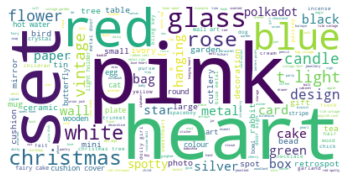

In [53]:
# Step 15: Create and display your wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(S1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### End of Part III
In this part, we performed a few analyses for the store boss. This part was useful in practising methods to visualize information.

With groupby, resampling, and wordcloud analysis, you were able to answer the store boss convincingly. 

Next up, we will be performing customer segmentation analysis with the customer purchase habits.